<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05


## Problema 01

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width = "500" align="center"/>


El **Iris dataset** es un conjunto de datos que contiene muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características en cada muestra: el largo y ancho del sépalo y del pétalo, ambos en centímetros. Este conjunto de datos es comúnmente utilizado para análisis de clasificación y para demostrar algoritmos de machine learning en la ciencia de datos.

### Descripción de los Datos:

1. **sepal_length**: Largo del sépalo en centímetros.
2. **sepal_width**: Ancho del sépalo en centímetros.
3. **petal_length**: Largo del pétalo en centímetros.
4. **petal_width**: Ancho del pétalo en centímetros.
5. **species**: La especie de la flor (Iris setosa, Iris virginica, Iris versicolor).

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:



In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
data= pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/iris_contaminados.csv")

data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del Experimento

El primer paso en el análisis es identificar las variables clave del estudio y definir su naturaleza:

* **species**: 
    * **Descripción**: Nombre de la especie de Iris a la que pertenece cada observación.
    * **Tipo de dato**: *string*.
    * **Restricciones**: Solo se consideran tres especies (Iris setosa, Iris virginica, e Iris versicolor).
* **sepalLength**: 
    * **Descripción**: Longitud del sépalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores oscilan entre 4.0 cm y 7.0 cm.
* **sepalWidth**: 
    * **Descripción**: Ancho del sépalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores varían entre 2.0 cm y 4.5 cm.
* **petalLength**: 
    * **Descripción**: Longitud del pétalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores están comprendidos entre 1.0 cm y 7.0 cm.
* **petalWidth**: 
    * **Descripción**: Ancho del pétalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores se encuentran entre 0.1 cm y 2.5 cm.

Esta descripción clara de las variables y sus limitaciones es esencial para establecer una base sólida en el análisis de datos.

Su objetivo es realizar un **Análisis Exploratorio de Datos (EDA)** completo y riguroso. Para lograrlo, siga las instrucciones proporcionadas a continuación, asegurándose de extraer conclusiones intermedias después de cada pregunta, y de elaborar una conclusión general al finalizar todas las preguntas.

 Esto le permitirá identificar patrones, anomalías y relaciones clave entre las variables antes de proceder con un análisis más profundo.

1. Realice un conteo de los elementos en la columna **species** y ajuste cualquier valor que considere incorrecto. Reemplace los valores `NaN` con "default".

In [3]:
data['species'].value_counts()

species
versicolor    39
setosa        35
virginica     34
Setosa        10
virginica      6
 virginica     5
VIRGINICA      5
Versicolor     5
VERSICOLOR     5
SETOSA         5
Name: count, dtype: int64

In [4]:
# FIXME
data['species'] = data["species"].str.lower().str.strip().fillna("default")
data['species'].value_counts()


species
setosa        50
virginica     50
versicolor    49
default        1
Name: count, dtype: int64

Se encuentran irregularidades en la forma de nombres de especie escritos con mayusculas, solo con minusculas, mezclas de estas formas y con espacios en el strnig. Se normaliza con tal de limpiar un poco la informacion.

2. Genere un gráfico de box-plot para visualizar la distribución del largo y ancho de los pétalos y sépalos. Antes de crear el gráfico, reemplace los valores `NaN` por **0**.

<Axes: xlabel='variables', ylabel='valor'>

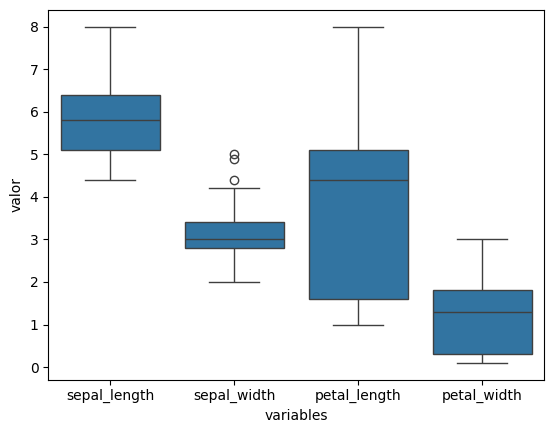

In [5]:
# FIXME
data['petal_length'].fillna(0)
data['petal_width'].fillna(0)
data['sepal_length'].fillna(0)
data['sepal_width'].fillna(0)
data_melted = data.melt(var_name ='variables',value_name='valor')
data_melted= data_melted[data_melted['variables'] != 'species']
data_melted
sns.boxplot(data =data_melted,x='variables',y='valor')

Podemos apreciar que la distribución de los datos no cumple con lo estipulado por la descripcion entregada, con largos de  petalo que es  escapan del rango pedido, por ejemplo.

3. Utilizando los rangos de valores válidos previamente definidos para el largo y ancho de los pétalos y sépalos, agregue una nueva columna denominada **label**. Esta columna debe identificar si algún valor se encuentra fuera del rango permitido. Marque los valores fuera de rango con "fuera de rango" y los valores dentro del rango con "dentro del rango".

In [6]:
# FIXME
rango_largo_sepalo = (4.0,7.0)
rango_ancho_sepalo = (2.0,4.5)
rango_largo_petalo = (1.0,7.0)
rango_ancho_petalo = (0.1,2.5)

mask_largo_sepalo = data['sepal_length'].between(*rango_largo_sepalo)
mask_ancho_sepalo = data['sepal_width'].between(*rango_ancho_sepalo)
mask_largo_petalo = data['petal_length'].between(*rango_largo_petalo)
mask_ancho_petalo = data['petal_width'].between(*rango_ancho_petalo)
data.loc[mask_largo_sepalo & mask_ancho_sepalo & mask_largo_petalo & mask_ancho_petalo,'label'] = 'dentro del rango'
print(f'Hay {data['label'].isna().sum()} flores fuera de los valores admitidos')
data['label']  = data['label'].fillna('fuera del rango') 
data

Hay 21 flores fuera de los valores admitidos


,sepal_length,sepal_width,petal_length,petal_width,species,label
0,4.4,3.2,1.3,3.0,setosa,fuera del rango
1,7.2,3.6,6.1,2.5,virginica,fuera del rango
2,6.3,3.3,6.0,2.5,virginica,dentro del rango
3,6.7,3.3,5.7,2.5,virginica,dentro del rango
4,6.3,3.4,5.6,2.4,virginica,dentro del rango
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,dentro del rango
146,4.8,3.0,1.4,0.1,setosa,dentro del rango
147,4.9,3.1,1.5,0.1,setosa,dentro del rango
148,4.9,3.6,1.4,0.1,setosa,dentro del rango


4. Genere dos gráficos de dispersión:

   - El primero, mostrando la relación entre **sepal_length** y **petal_length**.
   - El segundo, mostrando la relación entre **sepal_width** y **petal_width**.

En ambos gráficos, los puntos deben estar categorizados por la columna **label** (es decir, "dentro del rango" o "fuera del rango"). 

Concluya los resultados evaluando la relación entre las variables y si los valores fuera de rango afectan significativamente la distribución o comportamiento de los datos.

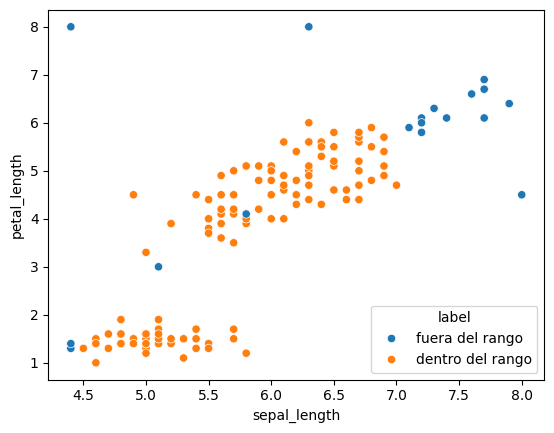

<function matplotlib.pyplot.show(close=None, block=None)>

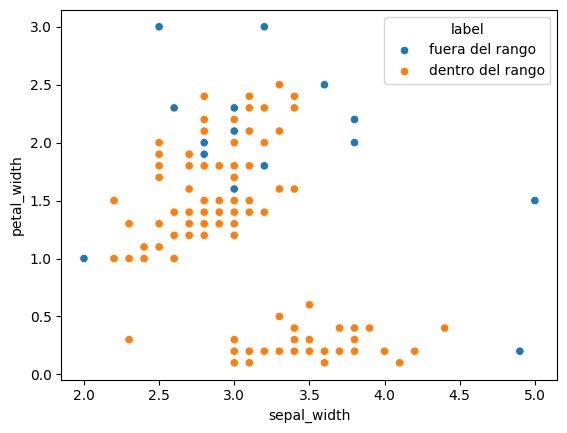

In [7]:
# FIXME
sns.scatterplot(data=data,x='sepal_length',y='petal_length',hue='label')
plt.show()
sns.scatterplot(data=data,x='sepal_width', y='petal_width',hue = 'label')
plt.show


5. Filtre los datos para conservar solo aquellos que estén dentro del rango válido. Luego, genere un gráfico de dispersión mostrando la relación entre **sepal_length** y **petal_length**, categorizando los puntos por la columna **species**. Esto permitirá visualizar cómo varían estas dimensiones entre las diferentes especies de Iris.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

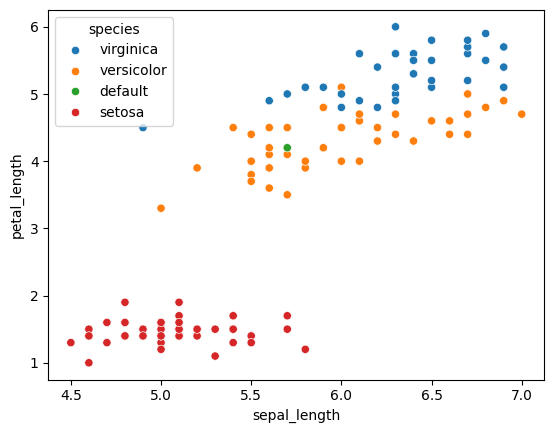

In [13]:
# FIXME
data = data[data['label'] == 'dentro del rango']
sns.scatterplot(data = data, x='sepal_length',y='petal_length',hue='species')